# Project 2 - Kevin Ky

# Introduction

### Scientific Question: Is there any genetic similarity between the genes of the zebrafish (Danio rario) and duck-billed platypus (Ornithorhynchus anatinus) who both have electric capabilities? Particularly, would these species share genes related to cellular insulation? 

Zebrafish possess an electric organ composed of cells called electrocytes that allow them to produce electricity. These electrocytes have been shown to contain significant differences in gene regulation, specifically related to cellular insulation (Gallant et al).

In the research article "Genomic basis for hte convergent evolution of electric organs" by Gallant et al, researchers identified various genes related cellular excitation that were up-regulated in Zebrafish. These genes included the gyltl1b (also known as LARGE2), which encodes for the protein glycosyltransferase and provides insulation for electrocytes. 

Platypi possess electroreceptors that are able to accurately detect electric signals for communication, navigation, defense, and hunting. Since both electroreceptors and electrocytes manage the flow of electrical currents, I hypothesize that the LARGE2 gene in zebrafish and platypi will share some of their sequence. 

### Scientific Hypothesis: If the zebrafish's electrocytes and the platypus' electroreceptors both manage the flow of electrical currents, then both of their LARGE2 genes (responsible for cellular insulation) would share a majority of their sequence. 

The genes of interest were inspired by work done in Gallant's research article. The article identified genes based on cellular function and LARGE2 (related to cellular insulation) was found to be highly up-regulated in zebrafish. 

Platypi also have a LARGE2 gene and I believe it would be genetically similar to the LARGE2 gene in zebrafish.   

To compare the genes between the two species, I searched online databases for the DNA sequences of these genes for each species. The sequences for both of these samples were found on the NCBI gene database.
https://www.ncbi.nlm.nih.gov/gene

# Part 1: Load in Packages

Packages used:

Biopython - various Python tools used for computational biology and bioinformatics. 

Seaborn -  a data visualization library for Python that uses matplotlib to create means of data visualization such as graphs, plots, and statistical diagrams. 

Pandas - a data manipulation library for Python that can be used to open data files, perform operations, and manipulate data prior to data analysis. 

In [39]:
#imports packages
from Bio import Align
from Bio import SeqIO
from Bio.Seq import Seq
import seaborn as sns
import pandas as pd

# Part 2: Performing Bioinformatics Analysis

In [42]:
#Read in fasta file containing sequence of the platypus LARGE2 gene
platypus=open("/Users/kevinky/Downloads/platypus_gyltl1b_datasets/ncbi_dataset/data/platypus_large2.fasta","r")
L2_platypus=""
#cleaning up the sequence
for line in platypus.readlines():
    if ">" not in line:
        line=line.replace("\n","")
        L2_platypus=L2_platypus+line
#code check
print(L2_platypus)

ATGGTGTGGGAGCGGTTCTCCGGGGGTCTGGGGATGGTCTGGGGCGGAGGGGTCTGGGGATGGTCTTCGGAGCCCGGGGATGGTGTCCGGGCCTGGGGGTGGTCTCGAGGGTCAGGGGATGGTGGGGGAGCGGTTCTCGGGGGTCTGGGGTCGGGGGGAGTCTGGGGATGTTGTGGGGGCGGTCTCGGAGGGATGGGGGTCGGGCGGGCGGGTCTCGGGGAGATGGGGATGGTCTGAGGGCCGTCTGGGGATGGTCTGGGGTCGGGTCTGGGGATGGGGTCGGAGGTCGGGTCTGTGGGGAGCGGCTCCGGGTGAGCCCGTGCCCCCTCCACGCCCCCTCCCGCAGACGGGCTGCCGCTGCCGCTGGCATCCCCGGCGGTGCCCCCGGCGGTGCCCCCGGCGGCCCGGTGCCCCGGGCGGGCGTTGGGGGCGGCCCTGGAGGCCCGGGTGCGGGCGGCCGAGGAGGAGAACCGGCGGCTGCGGGAGGCGCTGGCCCAACGCGGGGACCCGGGCCCGCCCCACCACCAGCCCCCGCCCCCGGGGGAAGGCCACGACCACCCCTGCGCCCGGCAGGCCCAGGCCCTCAAGTGCCAGGTGAGGGGGAGGTTGGGCCCGAAGGGAAGCCCCCTCGACCCTCCCCGGACCCCCAGCCCCAACCCCGGGTGGCCCCCGGGACCCCCGGGGGGAGGGAGGGGCCGGCCGAGGTCCGGCGGACCCAGGCCGCCCCGCCGTCGACGCCCCCAGCTCCTGCACGTGGCCATCGTCTGCGCCGGACACAACTCGAGCCGAGACGCGGTCACCCTGGTCAAGTCCATCCTCTTTCACAGGTACCCGCCCGTCCCTCCTCGTCTGGCCCCGGGGCCCCACTCGGGGCGTTCATCCGAGCGTAGCGGTTGAGCGCCTAAGTGTGTGCGGAGCGCCGTACTGAGCGCCGGGAAAGTGCGATTCGGCGACGGATAGGGACGATCCCTGCTCGACGACGGGCTCTCCCGCTCCTTCC

In [43]:
#Read in fasta file containing sequence of the zebrafish LARGE2 gene
zebrafish=open("/Users/kevinky/Downloads/zebrafish_gyltl1b_datasets/ncbi_dataset/data/zebrafish_large2.fasta","r")
L2_zebrafish=""
#cleaning up the sequence
for line in zebrafish.readlines():
    if ">" not in line:
        line=line.replace("\n","")
        L2_zebrafish=L2_zebrafish+line
#code check
print(L2_zebrafish)

GGGGAGGTGCTTCTATAGCTCTGTACCTTTCAGCTGCAGATCAGAGCACAGCGGCAAGAGATTAACACAAGCCTCGAGTCGGAGAGGAAGATGGAAGAGAACCACGGATGTGTTCACGCAAGAGACAGAAAGCTGATTTAGGATTGCTCGCCACTGGTTTCTTCTTCTAGGAGTGCCTAAGGGTGAGCACTCACTGTCCCTTCTCTGTCTCTTTTAGGAGATCCTCTGAGGCATGGACTACATATTATCTCAATCTTCCTGGGACTGAGATTTTCAGAGAGTCTCCTTTCACCTCGTTTCTATAAAAGTGAGGGATATTTGTGTCACGCACTGCTCCTATGGTTTCATTGGAGTGTTCGTTCAGTCTTCTCTGCCTTTCTCTCTTCCGCTCTCTGCCTCTGCGATCATGCTCTGAAATCATCAGTTTGCACATCGAGGGCACACCTGTCTCTCTCAAATGCGCTCACTTGTGTGGATCTAACCAGAACTCTGCAGCTGGGGATATTTGGGATTGATATTGCGATGGATTTTGGGATTGCAGTACATTCCATTTCACAGTGAACCTGCTGCTCAAGACAAGGGGCAAACGGGTGAGAACTTTCTATCTCTATCCATATATCTATCTAAAGTAATACCTTTAAGTAGACCATTAGATGTTCTTGGTTCCACAGAAGTTCAGAATCTCTTTAAATAATCCCAGTTTGTGCTGGAGAACATGATTGGGATTTAAATGAACATGTGTTACATTAAAGCGAACGAAACAACACATTGTTATGCACTTTTACCATTGCTTTTACTTTTGTGCACCGTCATACAAACACAATATCAACAAAAAAAATCTATCTATCATCTATCTATCTATCTATCTATCTATCTATCTATCTATCTATCTATCTATCTATCTGTCTGTCTGTCTGTCTGTCTGTCTGTCTGTCTGTCTGTCTGTCTACTCCAAGTAACACCTTTGTATAGACCATCAGATGTTCTTGGTTCCACAAAA

In [44]:
#code check
print(len(L2_platypus))

5697


In [45]:
#code check
print(len(L2_zebrafish))

6160


In [40]:
#aligns the sequence of LARGE2 from platypus and zebrafish
aligner=Align.PairwiseAligner()
seq1=L2_platypus
seq2=L2_zebrafish

alignments=aligner.align(seq1,seq2)
#prints out alignment score
print(alignments.score)

3315.0


In [37]:
#aligns the sequence of atp1a2a from platypus with itself
aligner=Align.PairwiseAligner()

seq1=L2_platypus
seq2=L2_zebrafish

alignments=aligner.align(seq1,seq1)
#prints out alignment score
print(alignments.score)

5697.0


In [38]:
#aligns the sequence of atp1a2a from zebrafish with itself
aligner=Align.PairwiseAligner()

seq1=L2_platypus
seq2=L2_zebrafish

alignments=aligner.align(seq2,seq2)
#prints out alignment score
print(alignments.score)

6160.0


In [4]:
from Bio.Align import MultipleSeqAlignment


# Part 3: Plotting the Results

I used a heatplot to organize the data from my pairwise sequence alignment. The heatplot provides a two-dimensional visual aid to present the data using a color gradiant to represent the size of numerical data. In this project, the numerical data includes the alignment scores found uding pairwise alignment.

The data from pairwise alignment was loaded into a 2x2 matrix where it can be used to 

Text(0.5, 1.0, 'LARGE2')

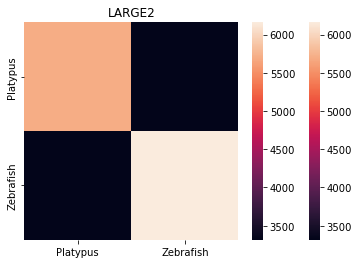

In [41]:
#creates a dataset containing the alignment scores from pairwise alignment
alignment_scores=[[5697.0,3315.0],
                 [3315.0,6160.0]]

#creates a matrix containing the alignment scores based on the previous dataset and defines the labels for the x-axis
data_matrix=pd.DataFrame(alignment_scores,columns=["Platypus","Zebrafish"])

#creates a heatplot titled LARGE2 from the previous matrix
LARGE2=sns.heatmap(data_matrix)

#defines the titles seen on the y-axis
sns.heatmap(data_matrix,yticklabels=["Platypus","Zebrafish"])
LARGE2.set_title("LARGE2")

# Part 4: Analyzing the Results

The heatplot "LARGE2" represent the relative alignment scores between the LARGE2 sequences of zebrafish and platypus, as well as each species with itself. The species name is labeled on both the X and Y axes, identifying the pairwise alignment that each box represents. The alignment scoring function was positive for matches and a higher score indicates a higher level of similarity. A much higher score was observed for each species aligned with itself, which is to be expected as we're comparing the same sequence. The platypus alignment with itself yielded a slightly lower score than the zebrafish, indicating that it is a shorter sequence. This difference is observable in the heatplot between the pale box and the orange box.

The pairwise alignment between the platypus and zebrafish yielded a score of 3315. This means the platypus LARGE2 gene, which has a sequence length of 5697 (as indicated by the alignment with itself), shares over half of its sequence with the zebrafish LARGE2 gene. The same can be concluded about the zebrafish LARGE2 gene, which has a sequence length of 6160 (also indicated by the alignment with itself). Therefore, my hypothesis that the two species would share a majority of their LARGE2 gene sequence (which is responsible for cellular insulation) was confirmed to be true.  